# <font color = blue> Problem Statement

A hospital wants to determine whether there is any difference in the average Turn Around Time (TAT) of reports of the laboratories on their preferred list. They collected a random sample and recorded TAT for reports of 4 laboratories. TAT is defined as sample collected to report dispatch.
Analyze the data and determine whether there is any difference in average TAT among the different laboratories at 5% significance level.

## <font color = purple> 1. Understanding Business Problem
    To find out if there is any difference in average TAT among the different laboratories at 5% significance level

## <font color = purple> 2. Given Data
    Level of Significance → α = 0.05

## <font color = purple> 3. Import Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
from matplotlib import pyplot as plt
from scipy import stats

import warnings
warnings.filterwarnings('ignore')

## <font color = purple> 4. Import Data

In [12]:
labs_data = pd.read_csv('LabTAT.csv')
labs_data

,Laboratory 1,Laboratory 2,Laboratory 3,Laboratory 4
0,185.35,165.53,176.70,166.13
1,170.49,185.91,198.45,160.79
2,192.77,194.92,201.23,185.18
3,177.33,183.00,199.61,176.42
4,193.41,169.57,204.63,152.60
...,...,...,...,...
115,178.49,170.66,193.80,172.68
116,176.08,183.98,215.25,177.64
117,202.48,174.54,203.99,170.27
118,182.40,197.18,194.52,150.87


## <font color = purple> 5. Perform Initial Analysis

In [13]:
labs_data.shape

(120, 4)

In [15]:
labs_data.dtypes

Laboratory 1    float64
Laboratory 2    float64
Laboratory 3    float64
Laboratory 4    float64
dtype: object

In [14]:
labs_data.isnull().sum()

Laboratory 1    0
Laboratory 2    0
Laboratory 3    0
Laboratory 4    0
dtype: int64

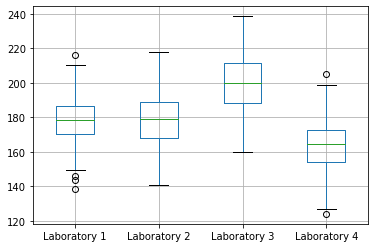

In [16]:
labs_data.boxplot(column= ['Laboratory 1','Laboratory 2','Laboratory 3','Laboratory 4'])
plt.show() # understanding the labs_data using boxplotb

### <font color = purple> Checking normality with the help of QQ Plot

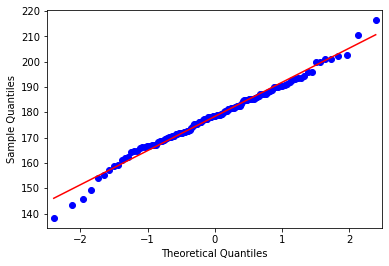

In [17]:
sm.qqplot(data = labs_data['Laboratory 1'],line= 'r')
plt.show()

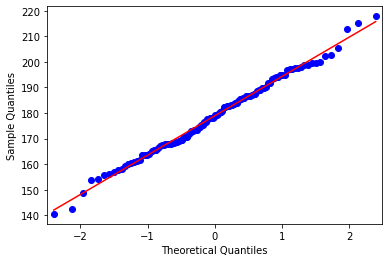

In [18]:
sm.qqplot(data = labs_data['Laboratory 2'],line= 'r')
plt.show()

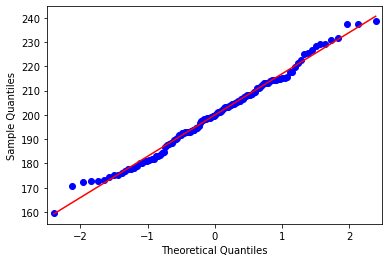

In [19]:
sm.qqplot(data = labs_data['Laboratory 3'],line= 'r')
plt.show()

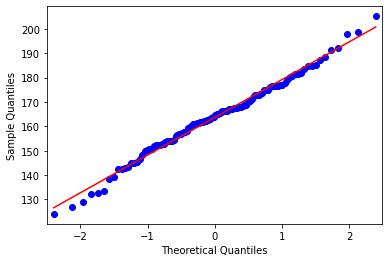

In [20]:
sm.qqplot(data = labs_data['Laboratory 4'],line= 'r')
plt.show()

## <font color = purple> 6. Hypothesis Formulation
    HO = There is no significant difference in average TAT among the 4 different laboratories.
    H1 = There is a significant difference in average TAT among the 4 different laboratories.
    α  = 5%**

## <font color = purple> 7. Perform Hypothesis Testing
Here we have 4 samples from 4 different labs. We can use one-way ANOVA test to determine if two or more groups have
the same population mean.

### <font color = purple> *Since we have 4 samples from 4 different labs. We will use 'one-way ANOVA test' to determine if two or more groups have the same population mean.*

In [21]:
f_statistic_labs,p_val_labs = stats.f_oneway(labs_data['Laboratory 1'], labs_data['Laboratory 2'], 
                                        labs_data['Laboratory 3'], labs_data['Laboratory 4'], axis=0)

In [22]:
p_val_labs

2.1156708949992414e-57

In [23]:
print('*************************************************')
print('F statistic Value           :',f_statistic_labs)
print('P-Value for laboratory data :',p_val_labs)
print('*************************************************')

*************************************************
F statistic Value           : 118.70421654401437
P-Value for laboratory data : 2.1156708949992414e-57
*************************************************


In [24]:
if p_val_labs < 0.05:
    print('At 5% level of significance we can reject the Null Hypothesis and we can state that there is a significant difference in average TAT among the 4 different laboratories.')
else:
    print('At 5% level of significance we cannot reject the Null Hypothesis and we can state that there is no significant difference in average TAT among the 4 different laboratories.')

At 5% level of significance we can reject the Null Hypothesis and we can state that there is a significant difference in average TAT among the 4 different laboratories.


## <font color = purple> 8. Verifying the above conclusion manually

##### Verifying the result by calculating the mean of 'Laboratory 1', 'Laboratory 2', 'Laboratory 3' and 'Laboratory 4'

In [25]:
mean_lab1 = labs_data['Laboratory 1'].mean()
mean_lab1

178.36158333333339

In [26]:
mean_lab2 = labs_data['Laboratory 2'].mean()
mean_lab2

178.9029166666668

In [27]:
mean_lab3 = labs_data['Laboratory 3'].mean()
mean_lab3

199.91325000000003

In [28]:
mean_lab4 = labs_data['Laboratory 4'].mean()
mean_lab4

163.6827499999999